Doing some reading, I've just come across an interesing factlet about adding random Gaussian processes.

# A Gaussian random process 

... is characterized by its mean $\mu$ and its variance $\sigma^2$. How does that look?

Let's use `scipy` to find out.

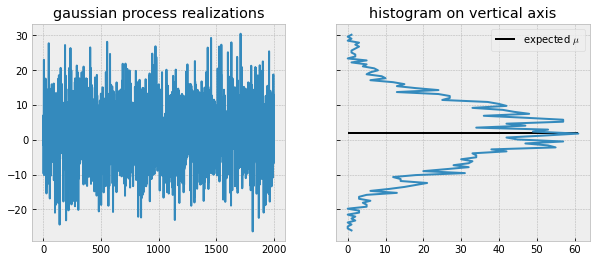

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
plt.style.use('bmh')

def plot_realizations(ax1, ax2, vals, mu, title='gaussian process realizations'):
    hist, bin_edges = np.histogram(vals, bins=100)
    ax1.plot(vals)
    ax1.set_title(title)
    ax2.plot(hist, (bin_edges[:-1]+bin_edges[1:])/2)
    ax2.hlines(mu, 0, hist.max(), label=r'expected $\mu$')
    ax2.set_title('histogram on vertical axis')
    ax2.legend()
    
rv = norm(loc=2, scale=9)
vals = rv.rvs(2000)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
plot_realizations(ax1, ax2, vals, mu=2)

# Two Gaussian processes 

Now what I find quite interesting is the following: if you have $X_1$ and $X_2$ two independent random processes that follow $X_1 \sim N(\mu_1, \sigma_1)$ and $X_2 \sim N(\mu_2, \sigma_2)$ then the random variable made of its sum is also Gaussian and distributed with the following properties 

$$
X_1 + X_2 \sim N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)
$$

Before reading about this, I naively tought that adding random variables is like adding histograms. But clearly, this formula states that it is not! 

Let's see if we can realize this with a simulation.

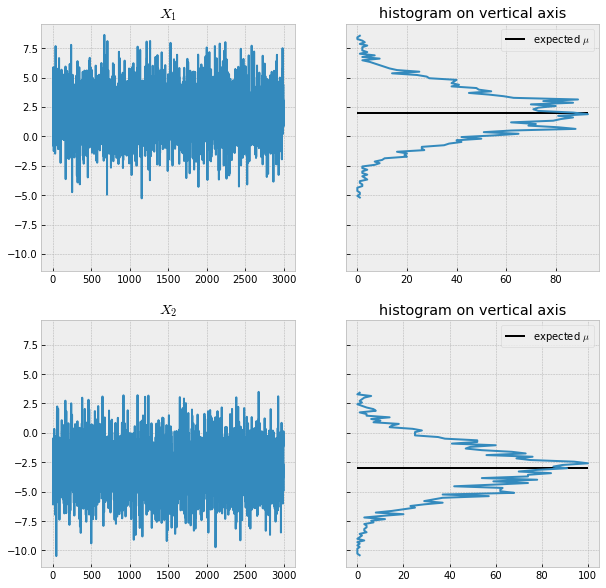

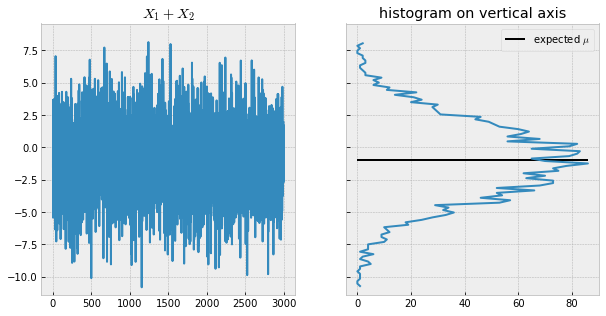

In [2]:
mu1, mu2 = 2, -3

gaussian1 = norm(loc=mu1, scale=2)
gaussian2 = norm(loc=mu2, scale=2)

samples1 = gaussian1.rvs(3000) 
samples2 =  gaussian2.rvs(3000)

samples = samples1 + samples2

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = axes.ravel()
plot_realizations(ax1, ax2, samples1, mu=mu1, title='$X_1$')
plot_realizations(ax3, ax4, samples2, mu=mu2, title='$X_2$')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 5))
plot_realizations(ax1, ax2, samples, mu=mu1+mu2, title='$X_1 + X_2$')
ax2.set_ylim(ax4.get_ylim());

I think this is neat! In the above graph, we can see that the summed variables move towers the sum of the individual variables, on average. And also that they are spread more compared to the initial random variables.

Adding random variables is definitely not adding their pdfs or cdfs or histograms...

Intuitively, adding the means also makes sense as an average: have one variable centered around a given value and another around another value, it is likely that their sum will be centered around the sum of them.